In [100]:
import scipy as sp
import scipy.io as io
import pdb
import pylab as pl
%matplotlib inline
import matplotlib as plt

In [101]:

def load_usps_data(fname, digit=3):
    ''' Loads USPS (United State Postal Service) data from <fname> 
    Definition:  X, Y = load_usps_data(fname, digit = 3)
    Input:       fname   - string
                 digit   - optional, integer between 0 and 9, default is 3
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels
                                 1 - where picture contains the <digit>
                                -1 - otherwise                           
    '''
    # load the data
    data = io.loadmat(fname)
    # extract images and labels
    X = data['data_patterns']
    Y = data['data_labels']
    Y = Y[digit,:]
    return X, Y
    

In [102]:
def train_perceptron(X,Y,iterations=200,eta=.1):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
                 acc     -  1D array of length iter, contains classification accuracies 
                            after each iteration  
                            Accuracy = #correctly classified points / N 
    '''
    acc = sp.zeros((iterations))
    #include the bias term by adding a row of ones to X 
    X = sp.concatenate((sp.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = sp.ones((X.shape[0]))/X.shape[0]
    for it in sp.arange(iterations):
        # indices of misclassified data
        wrong = (sp.sign(weights.dot(X)) != Y).nonzero()[0]
        # compute accuracy acc[it]
        acc[it] += 1 - 1.*len(wrong)/len(X.T)
        # ... your code here
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            # ... your code here
            w_point = sp.random.choice(wrong) 
            #update weight vector (use variable learning rate (eta/(1.+it)) )
            # ... your code here
            l_r = eta/(1.+it)
            weights += l_r * X.T[w_point] * Y[w_point]  
            if it % 20 == 0:
                print "Iteration %d:"%it + "Accuracy %0.2f" %acc[it]
    b = -weights[0] 
    w = weights[1:]
    #return weight vector, bias and accuracies
    return w,b,acc


In [103]:
def train_ncc(X,Y):
    ''' Trains a prototype/nearest centroid classifier
    Definition:  w, b   = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    # ... your code here 
    
    w_1 = (X*Y).mean(axis=1)
    pos_p = (Y + (sp.ones(len(Y)))).nonzero() 
    pos_n = (Y - (sp.ones(len(Y)))).nonzero()
    w_p = X.T[pos_p].mean(axis=0)
    w_n = X.T[pos_n].mean(axis=0)
    w = w_p - w_n
#    print w == w_1
    b = 0.5 * (w_p.dot(w_p) - w_n.dot(w_n))
    return w,b

In [85]:
def plot_histogram(X, Y, w, b):
    ''' Plots a histogram of classifier outputs (w^T X) for each class with pl.hist 
    The title of the histogram is the accuracy of the classification
    Accuracy = #correctly classified points / N 
    
    Definition:     plot_histogram(X, Y, w, b)
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification   
    
    '''
    # ... your code here   
    bins = [-10,0,10]
    
    
    ''' Plots one image 
    Definition: plot_img(a) 
    Input:      a - 1D array that contains an image 
       
    a2 = sp.reshape(a,(int(sp.sqrt(a.shape[0])), int(sp.sqrt(a.shape[0]))))
    pl.imshow(a2, cmap='gray') 
    pl.colorbar()
    pl.setp(pl.gca(), xticks=[], yticks=[])
    '''
    wTX = sp.dot(w.T,X)
    hits=sp.sum((sp.sign(wTX-b)==Y))
    acc= float(hits)/len(Y)*100
    pl.title("Accuracy: %d%%"% acc)
    hit=wTX[sp.where(sp.sign(wTX-b)==1)]
    hit=wTX[Y==1]
    nohit=wTX[sp.where(sp.sign(wTX-b)==-1)]
    nohit=wTX[Y==-1]
    print(hit.shape,nohit.shape)
    #pl.hist(hit,histtype="bar",align="mid", color='green', label = "target",rwidth=0.7)    
    pl.hist(nohit,align="mid", color='red',label = "non-target",rwidth=0.9)
    pl.hist(hit,histtype="bar",align="mid", color='green', label = "target",rwidth=0.7)    
    pl.xlabel('w^T X')
    pl.legend()

((166,), (1841,))


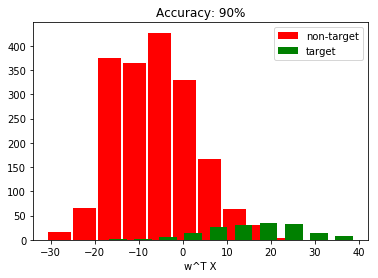

In [86]:
plot_histogram(imgs,labels,a[0],a[1])

(array([ 7.,  3.]), array([-1,  0,  1]), <a list of 2 Patch objects>)

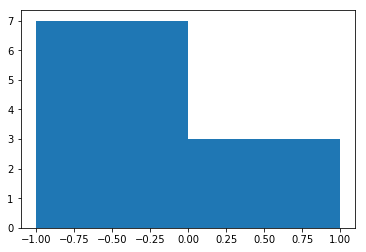

In [75]:
pl.hist((sp.arange(10)-7)/10., bins=[-1,0,1])

In [104]:
def compare_classifiers(digit = 3):
    ''' Loads usps.mat data, trains the perceptron and the Nearest centroid classifiers, 
    and plots their weight vector and classifier output
    Definition: compare_classifiers(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_ncc,b_ncc = train_ncc(X,Y)
    w_per,b_per,_ = train_perceptron(X,Y)
    
    pl.figure()
    pl.subplot(2,2,1)
    plot_img(w_ncc)
    pl.title('NCC')
    pl.subplot(2,2,3)
    plot_histogram(X, Y, w_ncc, b_ncc)
    
    pl.subplot(2,2,2)
    plot_img(w_per)
    pl.title('Perceptron')
    pl.subplot(2,2,4)
    plot_histogram(X, Y, w_per, b_per)
    
    
   

In [105]:
def analyse_accuracies_perceptron(digit = 3):
    ''' Loads usps.mat data and plots digit recognition accuracy in the linear perceptron
    Definition: analyse_perceptron(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_per,b_per,acc = train_perceptron(X,Y)
    
    pl.figure()
    pl.plot(sp.arange(len(acc)),acc)
    pl.title('Digit recognition accuracy')      
    pl.xlabel('Iterations')
    pl.ylabel('Accuracy')
   


In [106]:
def plot_img(a):
    ''' Plots one image 
    Definition: plot_img(a) 
    Input:      a - 1D array that contains an image 
    '''   
    a2 = sp.reshape(a,(int(sp.sqrt(a.shape[0])), int(sp.sqrt(a.shape[0]))))
    pl.imshow(a2, cmap='gray') 
    pl.colorbar()
    pl.setp(pl.gca(), xticks=[], yticks=[])
            


In [107]:
def plot_imgs(X, Y):   
    ''' Plots 3 images from each of the two classes 
    Definition:         plot_imgs(X,Y)
    Input:       X       -  DxN array of N pictures with D pixel
                 Y       -  1D array of length N of class labels {1, -1}                  
    '''
    pl.figure()
    for i in sp.arange(3):
        classpos = (Y == 1).nonzero()[0]
        m = classpos[sp.random.random_integers(0, classpos.shape[0]-1)]
        pl.subplot(2,3,1+i)
        plot_img(X[:, m])
    for i in sp.arange(3):
        classneg = (Y != 1).nonzero()[0]
        m = classneg[sp.random.random_integers(0, classneg.shape[0]-1)]
        pl.subplot(2,3,4+i)
        plot_img(X[:, m])

# Exercise 1:

In [108]:
imgs, labels = load_usps_data('usps.mat')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 165 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 1840 + 1) instead
  from ipykernel import kernelapp as app


We have 2007 images with 256 pixels each.
1


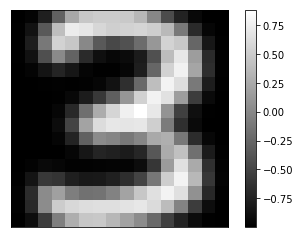

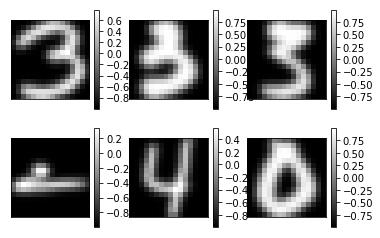

In [109]:
plot_img(imgs.T[2])
plot_imgs(imgs, labels)

print "We have", len(imgs.T), "images with", len(imgs), "pixels each."
print labels[2]

# Exercise 2

Iteration 0:Accuracy 0.90
Iteration 20:Accuracy 0.90
Iteration 40:Accuracy 0.93
Iteration 60:Accuracy 0.95
Iteration 80:Accuracy 0.94
Iteration 100:Accuracy 0.95
Iteration 120:Accuracy 0.95
Iteration 140:Accuracy 0.95
Iteration 160:Accuracy 0.96
Iteration 180:Accuracy 0.96


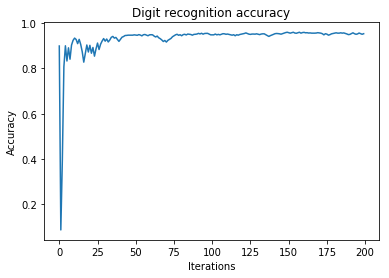

In [110]:
analyse_accuracies_perceptron(3)

Iteration 0:Accuracy 0.90
Iteration 20:Accuracy 0.94
Iteration 40:Accuracy 0.95
Iteration 60:Accuracy 0.96
Iteration 80:Accuracy 0.96
Iteration 100:Accuracy 0.97
Iteration 120:Accuracy 0.97
Iteration 140:Accuracy 0.96
Iteration 160:Accuracy 0.96
Iteration 180:Accuracy 0.97
((166,), (1841,))
((166,), (1841,))


AttributeError: 'module' object has no attribute 'save_hig'

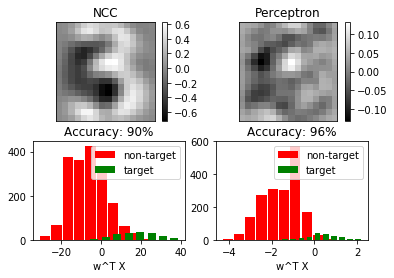

In [111]:
compare_classifiers()

wE WOULD PREFARE the Perceptron.

In [13]:
a = train_ncc(imgs, labels)

In [14]:
a[0].shape == a[1].shape

False